In [264]:
import pandas as pd
import numpy as np
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats
from statsmodels.graphics.regressionplots import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model


%matplotlib inline
plt.rcParams['figure.figsize'] = (15,5)

In [152]:
crime = pd.read_excel('crime_oregon.xlsx')
print(crime)

               City  Population  Violent crime  \
0            Albany     51645.0           40.0   
1             Amity      1624.0            1.0   
2           Ashland     20455.0           33.0   
3           Astoria      9543.0           33.0   
4            Athena      1144.0            1.0   
5         Aumsville      3738.0            6.0   
6        Baker City      9660.0           27.0   
7            Bandon      3039.0            1.0   
8             Banks      1862.0            4.0   
9         Beaverton     93551.0          124.0   
10             Bend     79926.0          182.0   
11      Black Butte         NaN            0.0   
12         Boardman      3369.0            8.0   
13        Brookings      6313.0            2.0   
14            Burns      2706.0            1.0   
15            Canby     16031.0           13.0   
16     Cannon Beach      1692.0            1.0   
17          Carlton      2022.0            4.0   
18    Central Point     17485.0           33.0   


In [224]:
crime = crime.rename(columns={'Property crime': 'Property_crime'})
crime = crime.rename(columns={'Rape (revised definition)1':'Rape1'})

In [244]:
crime = crime.rename(columns={'Motor vehicle theft':'Motor_Vehicle_theft'})

In [245]:
# Property_crime will be our dependent variable. We will find
# better parameters than the Thinkful walkthrough.

In [246]:
crime.describe()

,Population,Violent_crime,Murder and nonnegligent manslaughter,Rape1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_crime,Burglary,Larceny-theft,Motor_Vehicle_theft,Arson
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,2.121260,40.284404,0.284404,3.091743,2.256881,11.385321,23.266055,626.642202,96.330275,489.908257,40.403670,4.522936
std,0.386845,97.498062,0.903612,9.173776,6.371818,35.938710,55.356027,1230.803385,207.331014,933.206177,102.996055,9.692109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.043009,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,48.000000,8.000000,33.000000,3.000000,0.000000
50%,2.199648,10.000000,0.000000,0.000000,0.000000,1.000000,5.000000,268.000000,37.000000,207.000000,9.000000,1.000000
75%,2.279224,33.000000,0.000000,2.000000,2.000000,7.000000,21.000000,602.000000,89.000000,497.000000,32.000000,4.000000
max,2.482696,611.000000,7.000000,68.000000,52.000000,275.000000,346.000000,7920.000000,1539.000000,5773.000000,656.000000,55.000000


In [228]:
# Let's get rid of na values
crime = crime.fillna(0)

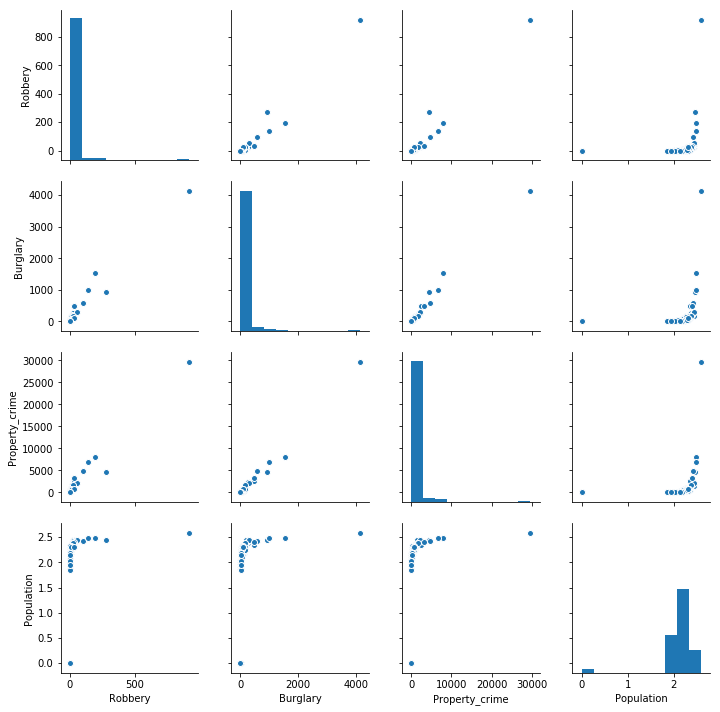

In [229]:
sns.pairplot(crime[['Robbery', 'Burglary', 'Property_crime', 'Population']])

In [230]:
# seems I have an outlier, I'm guessing it's Portland. 
# I'm going to take the log of population, since there 
# are a couple other points that are outliers

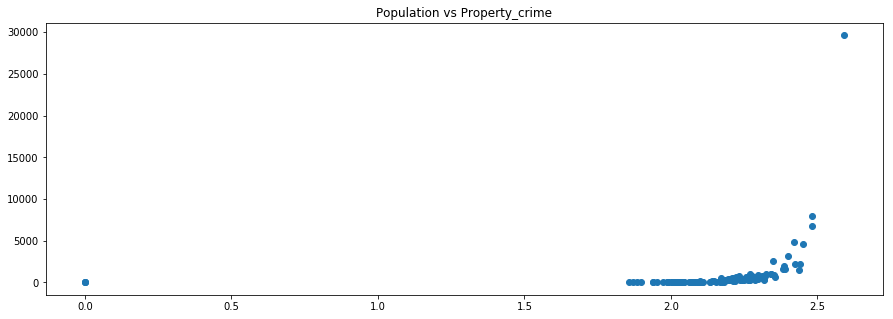

In [231]:
plt.scatter(crime['Population'], crime['Property_crime'])
plt.title('Population vs Property_crime')
plt.show()

In [232]:
# this looks fairly linear if I drop Portland from the list.

In [233]:
print(crime.loc[crime['Population'] == 609136])

Empty DataFrame
Columns: [City, Population, Violent_crime, Murder and nonnegligent manslaughter, Rape1, Rape (legacy definition)2, Robbery, Aggravated assault, Property_crime, Burglary, Larceny-theft, Motor vehicle theft, Arson]
Index: []


In [234]:
crime = crime.drop(crime.index[[78]])

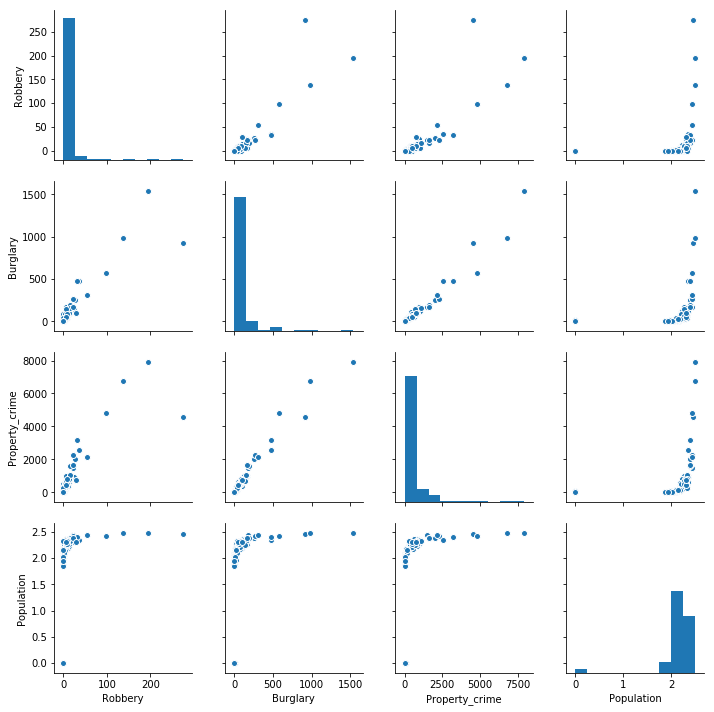

In [235]:
sns.pairplot(crime[['Robbery', 'Burglary', 'Property_crime', 'Population']])

In [236]:
# writing out formula
linear_formula = "Property_crime ~ Population+Robbery+Burglary"
lm = smf.ols(formula=linear_formula,data=crime).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Property_crime   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     803.6
Date:                Wed, 30 May 2018   Prob (F-statistic):           3.05e-72
Time:                        11:38:32   Log-Likelihood:                -756.63
No. Observations:                 109   AIC:                             1521.
Df Residuals:                     105   BIC:                             1532.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -180.6433    139.802     -1.292      0.1

In [237]:
lm.pvalues

Intercept     1.991457e-01
Population    8.815311e-02
Robbery       5.017875e-02
Burglary      2.338273e-41
dtype: float64

In [238]:
# Let's do some tests to see what's wrong with our model.

In [241]:
x = crime[['Population', 'Burglary', 'Robbery']]

In [242]:
correlation_matrix = x.corr()
display(correlation_matrix)

,Population,Burglary,Robbery
Population,1.000000,0.289565,0.233349
Burglary,0.289565,1.000000,0.903816
Robbery,0.233349,0.903816,1.000000


 Well it appears we have very strong multicollinearity in our model.
 Let's try some new variable and see if we can better model for 
 property crime. We should drop burglary or robbery since they are highly correlated and similar crimes. Let's try taking the log of population since we still have some outliers. We will add violent crime and arson as new features. 

In [247]:
linear_formula = 'Property_crime ~ Robbery+Rape1+Motor_Vehicle_theft+Arson'
lm = smf.ols(formula=linear_formula,data=crime).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Property_crime   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     864.2
Date:                Wed, 30 May 2018   Prob (F-statistic):           8.27e-79
Time:                        11:40:54   Log-Likelihood:                -737.18
No. Observations:                 109   AIC:                             1484.
Df Residuals:                     104   BIC:                             1498.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              99.1274    

In [248]:
lm.pvalues

Intercept              3.920946e-05
Robbery                1.434584e-01
Rape1                  4.821023e-04
Motor_Vehicle_theft    6.225620e-19
Arson                  1.602006e-15
dtype: float64

In [249]:
lm.rsquared

0.970792071141282

In [250]:
lm.conf_int()

,0,1
Intercept,53.370746,144.884038
Robbery,-0.712830,4.842839
Rape1,7.585700,26.141849
Motor_Vehicle_theft,4.942969,7.138804
Arson,36.233023,55.650502


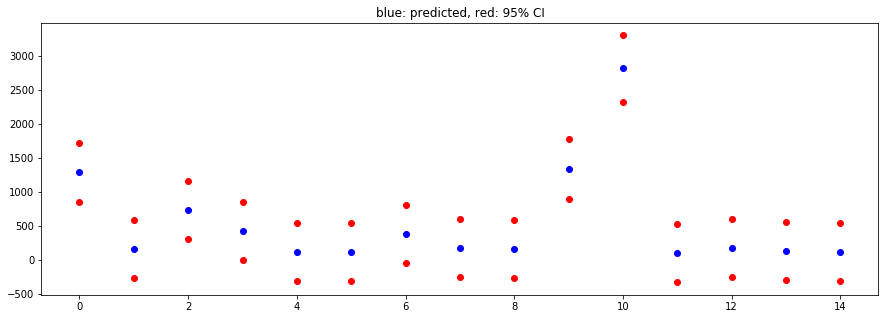

In [251]:
# wls_pred to build conf intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

Let's check our Linear assumptions to finish up.

In [254]:
y = crime[['Robbery', 'Rape1', 'Motor_Vehicle_theft', 'Arson']]

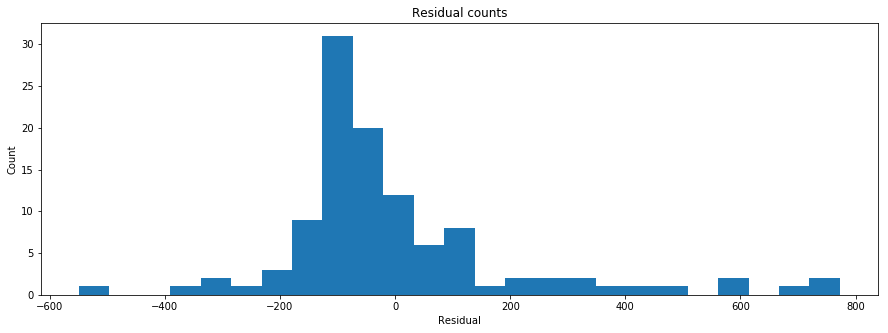

In [256]:
# checking multivariate normality
predicted = lm.predict(y).ravel()
actual = crime['Property_crime']
# calc error
residual = actual - predicted

plt.hist(residual, bins=25)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [257]:
print(residual.mean())

1.8617523425053635e-13


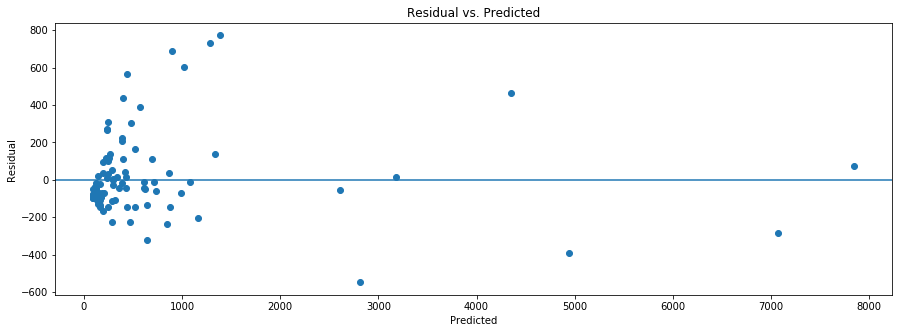

In [258]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [259]:
correlation_matrix = y.corr()
display(correlation_matrix)

,Robbery,Rape1,Motor_Vehicle_theft,Arson
Robbery,1.000000,0.620923,0.899674,0.752657
Rape1,0.620923,1.000000,0.749599,0.854534
Motor_Vehicle_theft,0.899674,0.749599,1.000000,0.806162
Arson,0.752657,0.854534,0.806162,1.000000


In [275]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
y, crime['Property_crime'], test_size=0.5, random_state = 5)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(54, 4)
(55, 4)
(54,)
(55,)


In [276]:
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)
pred_train = lm.predict(x_train)
pred_test = lm.predict(x_test)

In [277]:
print ('Fit a model X_train, and calculate MSE with y_train:', np.mean((y_train - lm.predict(x_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with X_test, y_test:', np.mean((y_test - lm.predict(x_test)) ** 2))

Fit a model X_train, and calculate MSE with y_train: 27933.138726853304
Fit a model X_train, and calculate MSE with X_test, y_test: 418200.96267203667


Text(0,0.5,'Residuals')

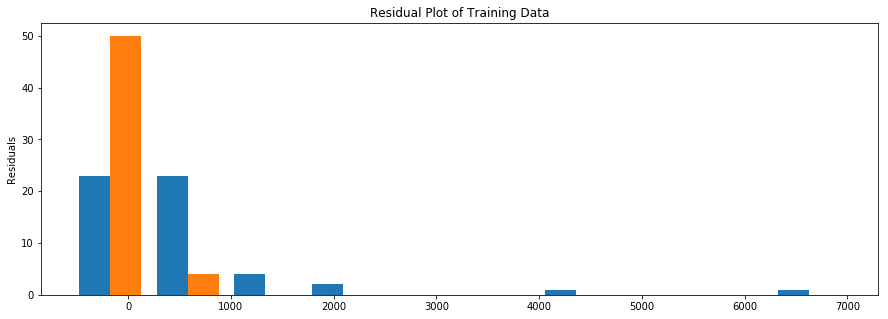

In [278]:
train_residuals = (lm.predict(x_train), lm.predict(x_train) - y_train)
test_residuals = (lm.predict(x_test), lm.predict(x_test) - y_test)
plt.hist(train_residuals)
plt.title('Residual Plot of Training Data')
plt.ylabel('Residuals')

Text(0.5,1,'Residual Plot of Test Data')

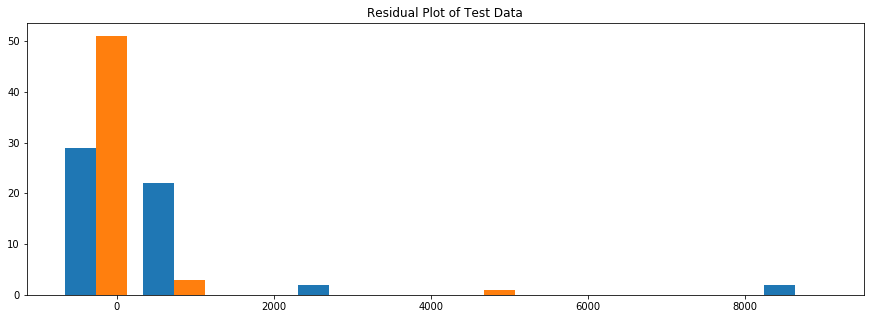

In [279]:
plt.hist(test_residuals)
plt.title('Residual Plot of Test Data')

It looks like our model is suffering from heteroscedasticity since it seems that the residuals get smaller as the prediction moves from large to small. We can either transform a variable or there is a variable missing and we need to add one or more. Our model still has multicollinearity but that seems unavoidable with the dataset that we have. 